Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset is loaded into padas DataFrame

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shows dataset size,
reveals data types and missing values,
provides statistical insights to detect anomalies and outliers.

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Identifies missing values by checking each column for null entries and returning the total count of missing values per column

In [5]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Converting TotalCharges to numeric introduces NaN values where conversion failed

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Median is used because it is robust to outliers and suitable for skewed financial data

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\kusum\AppData\Local\Temp\ipykernel_9172\419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Extreme values are capped to reduce skewness without deleting customer records

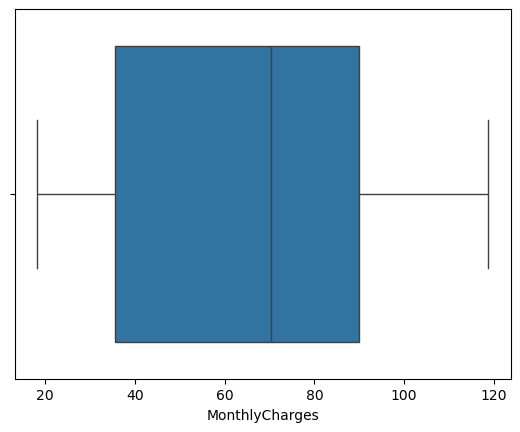

In [9]:
sns.boxplot(x=df['MonthlyCharges'])
plt.show()


In [10]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower, upper)


One-hot encoding converts categorical variables into numerical form required for machine learning models

In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [12]:
df = pd.get_dummies(df, drop_first=True)


In [13]:
df[df.select_dtypes(bool).columns] = df.select_dtypes(bool).astype(int)


Identification of Leakage:
1.TotalCharges is derived from MonthlyCharges × tenure.
2.If predicting churn at an early stage, using full tenure data leaks future information.
3.Billing-related variables may not be available at prediction time.
We identify leakage beacuse Leakage causes unrealistically high model accuracy and poor real-world performance.

This code ensures : No missing values,
All features are numerical,
Target variable is encoded

In [14]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7073 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: float64(2), int64(7071)
memory usage: 380.1 MB


Cleaned CSV file

In [ ]:
df.to_csv("cleaned.csv", index=False)


1.Why did you choose specific imputation methods?

Median imputation was chosen to handle skewed numerical distributions while minimizing the influence of outliers.

2.How and why did you handle outliers?

The IQR method was used to cap extreme values, preserving data integrity while reducing distortion in numerical features.

3.Where and how might data leakage occur?

Variables such as TotalCharges and tenure may leak future customer behavior into the model if not carefully handled during prediction.